# College Admission Classification Example

> Enzo Sergiani


Import libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

Read the data from the csv file


In [2]:
data = pd.read_csv(
    "../../data/college_admission_scores.csv", delimiter=";", decimal="."
)

data

,Exam1,Exam2
0,1.74,4.69
1,3.18,8.84
2,5.85,13.76
3,10.56,18.22
4,15.38,18.69
...,...,...
145,9.08,15.88
146,6.36,11.19
147,11.79,17.65
148,15.49,14.49


Plot the data


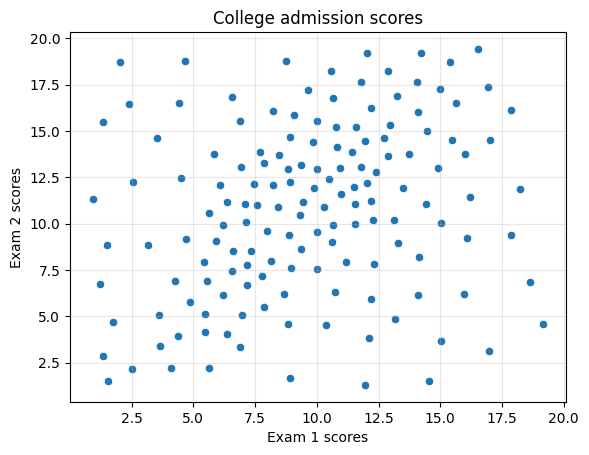

In [3]:
sns.scatterplot(data=data, x="Exam1", y="Exam2")
plt.title("College admission scores")
plt.xlabel("Exam 1 scores")
plt.ylabel("Exam 2 scores")
plt.grid(True, alpha=0.3)
plt.show()

Calculate the decision boundary based on the mean of the two exams


In [4]:
def get_boundary(a: float, b: float) -> bool:
    return (a + b) / 2 >= 10


decision = get_boundary(data["Exam1"], data["Exam2"])

decision

0      False
1      False
2      False
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Length: 150, dtype: bool

Plot the data and color it using your calculated decision


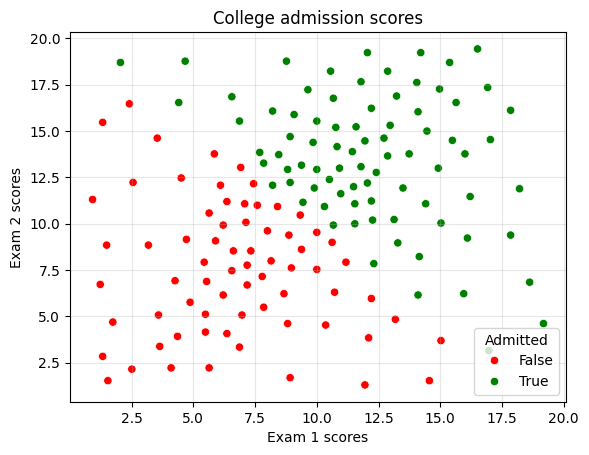

In [5]:
sns.scatterplot(
    data=data, x="Exam1", y="Exam2", hue=decision, palette={True: "green", False: "red"}
)
plt.title("College admission scores")
plt.xlabel("Exam 1 scores")
plt.ylabel("Exam 2 scores")
plt.grid(True, alpha=0.3)
plt.legend(title="Admitted")
plt.show()

Use a meshgrid to visualize the decision boundary as two spaces


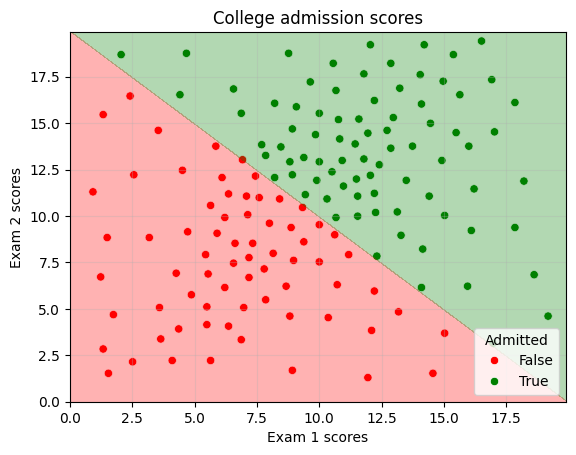

In [6]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

Z = (xx + yy) / 2 >= 10

sns.scatterplot(
    data=data,
    x="Exam1",
    y="Exam2",
    hue=decision,
    palette={True: "green", False: "red"},
)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "green"]))
plt.title("College admission scores")
plt.xlabel("Exam 1 scores")
plt.ylabel("Exam 2 scores")
plt.grid(True, alpha=0.3)
plt.legend(title="Admitted")
plt.show()

Now, load the data file 'College Admission Scores and Decisions.csv'


In [7]:
data = pd.read_csv(
    "../../data/college_admission_scores_and_decisions.csv", delimiter=";", decimal="."
)

data

,Exam1,Exam2,Decision
0,1.74,4.69,0
1,3.18,8.84,0
2,5.85,13.76,0
3,10.56,18.22,1
4,15.38,18.69,1
...,...,...,...
145,9.08,15.88,1
146,6.36,11.19,0
147,11.79,17.65,1
148,15.49,14.49,1


Make the same previous plot by replacing the color of your points by the decision data


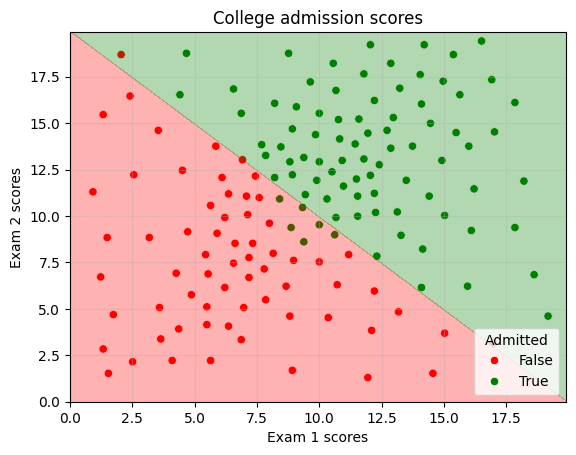

In [8]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

Z = (xx + yy) / 2 >= 10

sns.scatterplot(
    data=data,
    x="Exam1",
    y="Exam2",
    hue=data["Decision"].astype(bool),
    palette={True: "green", False: "red"},
)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "green"]))
plt.title("College admission scores")
plt.xlabel("Exam 1 scores")
plt.ylabel("Exam 2 scores")
plt.grid(True, alpha=0.3)
plt.legend(title="Admitted")
plt.show()

# Linear Discriminant Analysis


Create an LDA classifier and fit it over your data


In [9]:
def build_model(data: pd.DataFrame, model: type) -> tuple:
    X_train, X_test, y_train, y_test = train_test_split(
        data[["Exam1", "Exam2"]], data["Decision"]
    )
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_train, X_test, y_train, y_test, y_pred


lda, X_train, X_test, y_train, y_test, y_pred = build_model(
    data=data,
    model=LinearDiscriminantAnalysis,
)

Use a meshgrid to visualize the decision boundary of your LDA Classifier


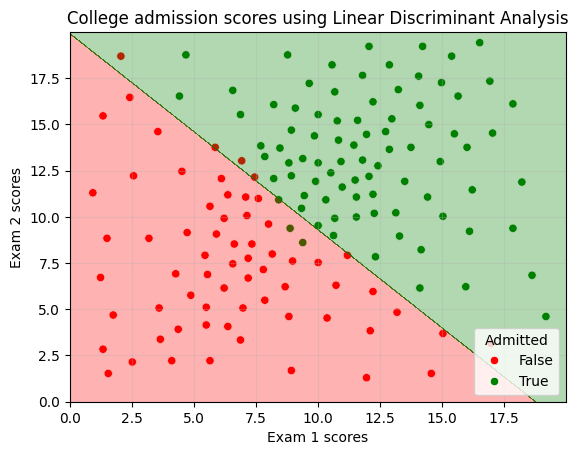

In [10]:
def print_boundary(data: pd.DataFrame, model: type, name: str) -> None:
    x_min, x_max = 0, 20
    y_min, y_max = 0, 20

    plot_step = 0.01

    xv, yv = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    mesh_data = pd.DataFrame(np.c_[xv.ravel(), yv.ravel()], columns=["Exam1", "Exam2"])
    Z = model.predict(mesh_data).reshape(xv.shape)

    plt.figure()
    sns.scatterplot(
        data=data,
        x=data["Exam1"],
        y=data["Exam2"],
        hue=data["Decision"].astype(bool),
        palette={True: "green", False: "red"},
    )
    plt.contourf(xv, yv, Z, alpha=0.3, cmap=ListedColormap(["red", "green"]))
    plt.title(f"College admission scores using {name}")
    plt.xlabel("Exam 1 scores")
    plt.ylabel("Exam 2 scores")
    plt.grid(True, alpha=0.3)
    plt.legend(title="Admitted")
    plt.show()


print_boundary(
    data=data,
    model=lda,
    name="Linear Discriminant Analysis",
)

What is its accuracy ?


In [11]:
def print_accuracy(y_test: float, y_pred: float) -> None:
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


print_accuracy(y_test=y_test, y_pred=y_pred)

Accuracy: 94.74%


What is the decision for a student with scores 19 and 0 ?


In [31]:
def get_decision(model: type, exam1_score: float, exam2_score: float) -> str:
    df = pd.DataFrame([[exam1_score, exam2_score]], columns=["Exam1", "Exam2"])
    prediction = model.predict(df)
    return "Admitted" if prediction[0] else "Not Admitted"


decision = get_decision(model=lda, exam1_score=19, exam2_score=0)z
print(f"Decision for student with scores 19 and 0: {decision}")

Decision for student with scores 19 and 0: Admitted


---

# Quadratic Discriminant Analysis


Same questions...


In [13]:
qda, X_train, X_test, y_train, y_test, y_pred = build_model(
    data=data,
    model=QuadraticDiscriminantAnalysis,
)

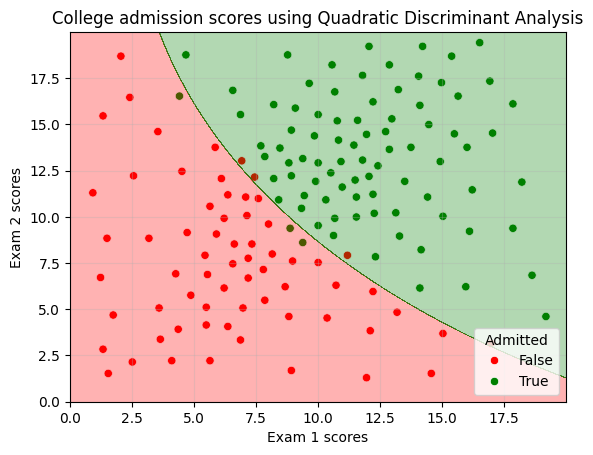

In [14]:
print_boundary(
    data=data,
    model=qda,
    name="Quadratic Discriminant Analysis",
)

In [15]:
print_accuracy(y_test=y_test, y_pred=y_pred)

Accuracy: 94.74%


In [33]:
decision = get_decision(model=lda, exam1_score=19, exam2_score=0)
print(f"Decision for student with scores 19 and 0: {decision}")

Decision for student with scores 19 and 0: Admitted


---

# Decisision Tree Classifier

Same questions


In [17]:
dtc, X_train, X_test, y_train, y_test, y_pred = build_model(
    data=data,
    model=DecisionTreeClassifier,
)

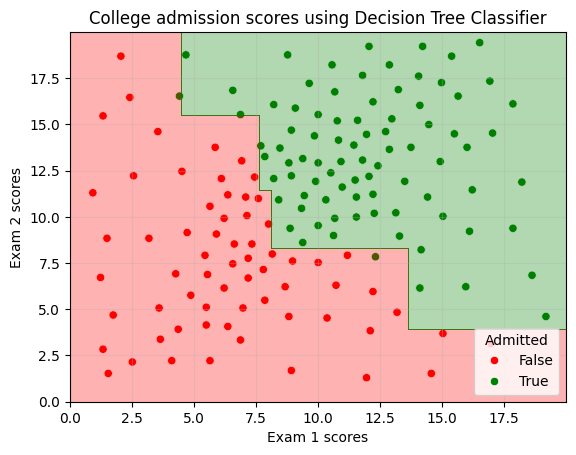

In [18]:
print_boundary(
    data=data,
    model=dtc,
    name="Decision Tree Classifier",
)

In [19]:
print_accuracy(y_test=y_test, y_pred=y_pred)

Accuracy: 94.74%


In [20]:
decision = get_decision(model=lda, exam1_score=19, exam2_score=0)
print(f"Decision for student with scores 19 and 0: {decision}")

Decision for student with scores 19 and 0: Admitted


In [21]:
from sklearn import tree

text_representation = tree.export_text(dtc, feature_names=["Test1", "Test2"])
print(text_representation)

|--- Test1 <= 7.64
|   |--- Test2 <= 15.49
|   |   |--- class: 0
|   |--- Test2 >  15.49
|   |   |--- Test1 <= 4.49
|   |   |   |--- class: 0
|   |   |--- Test1 >  4.49
|   |   |   |--- class: 1
|--- Test1 >  7.64
|   |--- Test2 <= 8.26
|   |   |--- Test1 <= 13.64
|   |   |   |--- class: 0
|   |   |--- Test1 >  13.64
|   |   |   |--- Test2 <= 3.88
|   |   |   |   |--- class: 0
|   |   |   |--- Test2 >  3.88
|   |   |   |   |--- class: 1
|   |--- Test2 >  8.26
|   |   |--- Test1 <= 8.11
|   |   |   |--- Test2 <= 11.43
|   |   |   |   |--- class: 0
|   |   |   |--- Test2 >  11.43
|   |   |   |   |--- class: 1
|   |   |--- Test1 >  8.11
|   |   |   |--- class: 1



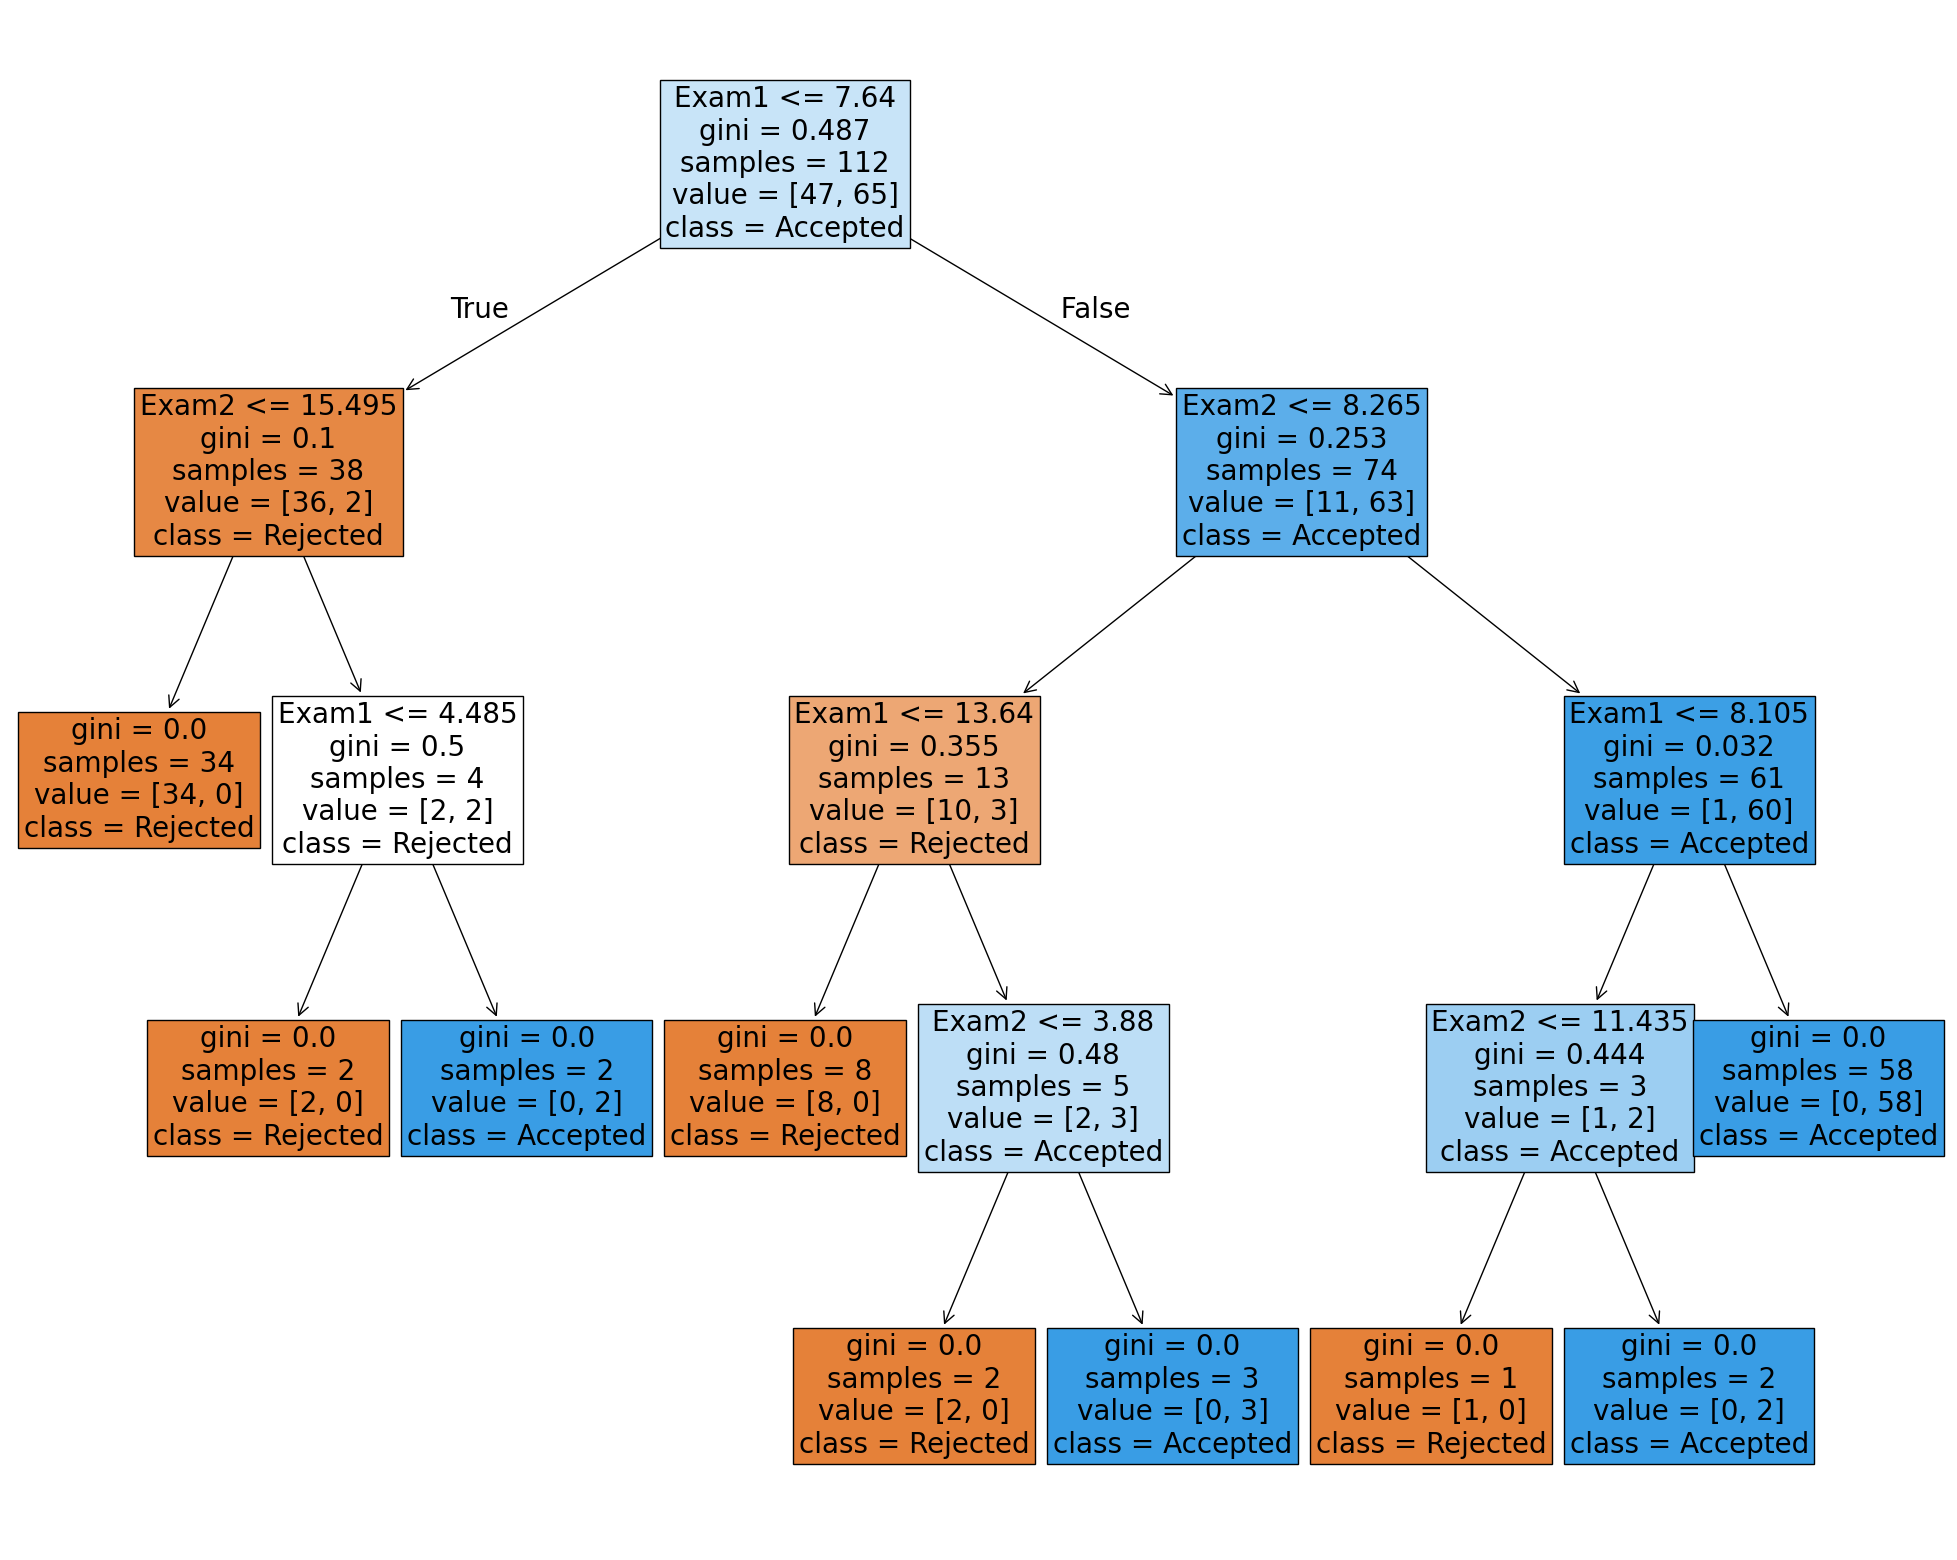

In [22]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    dtc,
    feature_names=["Exam1", "Exam2"],
    class_names=["Rejected", "Accepted"],
    fontsize=20,
    filled=True,
)

---

# K-Nearest Neighbors Classifier (KNN)

Same questions


In [23]:
knn, X_train, X_test, y_train, y_test, y_pred = build_model(
    data=data,
    model=KNeighborsClassifier,
)

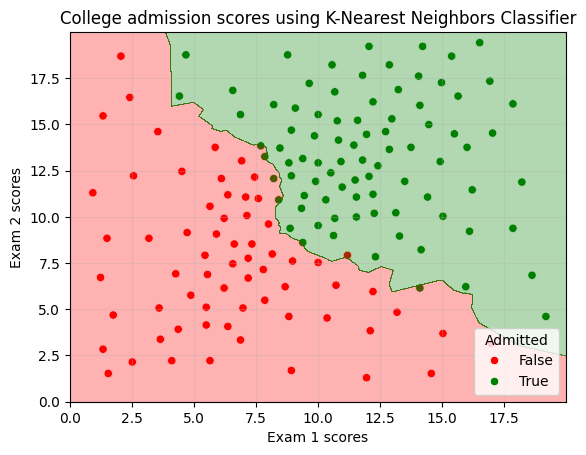

In [24]:
print_boundary(
    data=data,
    model=knn,
    name="K-Nearest Neighbors Classifier",
)

In [25]:
print_accuracy(y_test=y_test, y_pred=y_pred)

Accuracy: 86.84%


In [26]:
decision = get_decision(model=lda, exam1_score=19, exam2_score=0)
print(f"Decision for student with scores 19 and 0: {decision}")

Decision for student with scores 19 and 0: Admitted


---

# Random Forest Classifier

Same questions...


In [27]:
rfc, X_train, X_test, y_train, y_test, y_pred = build_model(
    data=data,
    model=RandomForestClassifier,
)

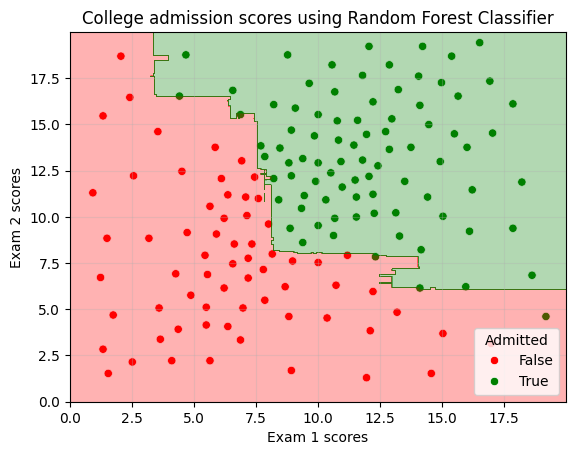

In [28]:
print_boundary(
    data=data,
    model=rfc,
    name="Random Forest Classifier",
)

In [29]:
print_accuracy(y_test=y_test, y_pred=y_pred)

Accuracy: 92.11%


In [30]:
decision = get_decision(model=lda, exam1_score=19, exam2_score=0)
print(f"Decision for student with scores 19 and 0: {decision}")

Decision for student with scores 19 and 0: Admitted
